In [1]:
# For embedding audio player
import IPython

# Plots
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6)

import numpy

In [6]:
import essentia.standard as es

audiofile = '/data/laluna.mp3'

# Load audio file.
# It is recommended to apply equal-loudness filter for PredominantPitchMelodia.
loader = es.EqloudLoader(filename=audiofile, sampleRate=44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)



Duration of the audio sample [sec]:
30.0


In [7]:
# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required).

pitch_extractor = es.PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

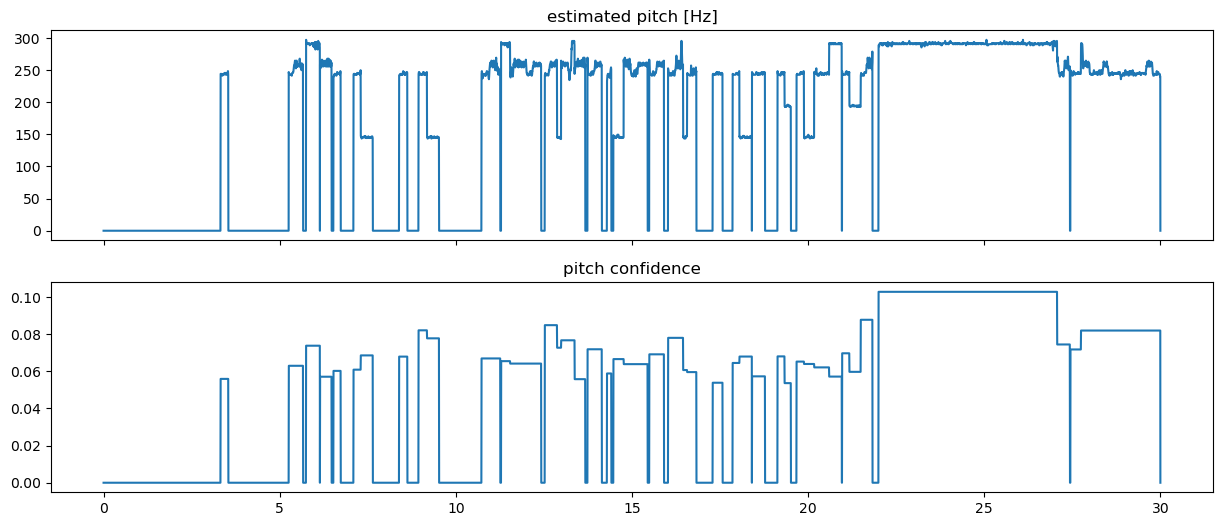

ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

<Figure size 1500x600 with 0 Axes>

In [13]:


# Pitch is estimated on frames. Compute frame time positions.
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time.
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.savefig('/data/img.png')
plt.show()


In [9]:
from mir_eval.sonify import pitch_contour

from tempfile import TemporaryDirectory
temp_dir = TemporaryDirectory()

# Essentia operates with float32 ndarrays instead of float64, so let's cast it.
synthesized_melody = pitch_contour(pitch_times, pitch_values, 44100).astype(numpy.float32)[:len(audio)]
es.AudioWriter(filename=temp_dir.name + 'flamenco_melody.mp3', format='mp3')(es.StereoMuxer()(audio, synthesized_melody))

IPython.display.Audio(temp_dir.name + 'flamenco_melody.mp3')

[mp3 @ 0x1ec0000] Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.
[AVIOContext @ 0x2333500] Statistics: 2 seeks, 4 writeouts
